In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Loading the datasets

In [5]:
# non_merged pull request with the labels and complete characteristics for pr submitter
df_nonmerged = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Non_Merged/Sample/temp/Sample_9000_pr.csv")
# merged pull request that has no labels as nothing is rejected
df_merged = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/Merged/pr_merged_final_April_2023.csv")
# all of the data that is merged and non merged
df_comp = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/pr_final_April_2023.csv")
# original dataset for getting the characterisitics of the pull request
df_TSE = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests.csv")

/var/folders/v7/m50ww3p142130jtt2scggl3r0000gq/T/ipykernel_4439/2698842826.py:6: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comp = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Dataset/pr_final_April_2023.csv")
/var/folders/v7/m50ww3p142130jtt2scggl3r0000gq/T/ipykernel_4439/2698842826.py:8: DtypeWarning: Columns (8,14,31,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_TSE = pd.read_csv("/Users/amirrshams/Library/CloudStorage/OneDrive-UniversityofWaterloo/Thesis/Dataset/Reza's Dataset/TSE paper/2020-TSE-Developers-Perceptible-Ethnicity-and-PR-evaluation-main/Dataset/pull_requests.csv")


In [107]:
df_comp.head()

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
0,2,not-merged,1,1,1,united states,japan,North America,0,White,White,1,0.923822,0.030206,0.043507,0.001134,0.974386,0.011098,0.005310,0.008516,White,White,White,White,White,0,7,29,9,0,0,47
1,2,merged,0,1,1,\N,japan,\N,0,Unknown,White,0,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown,0,6,33,2,0,0,10
2,2,merged,0,1,1,\N,japan,\N,0,Unknown,White,0,0.763503,0.187838,0.007003,0.001286,0.974386,0.011098,0.005310,0.008516,Unknown,White,Unknown,Unknown,Unknown,0,5,20,2,0,0,9
3,3,merged,7,3,1,united states,\N,North America,0,White,White,1,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White,0,0,0,21,0,1,28
4,3,merged,3,1,1,united states,\N,North America,0,White,White,1,0.964081,0.001878,0.030626,0.001998,0.937730,0.058950,0.000949,0.001142,White,White,White,White,White,0,2,100,21,0,1,28


#### Merging the characteristics of pr submitter with the complete dataset

In [10]:
df_TSE[df_TSE.duplicated(['pr_id'])].count()


Unnamed: 0                  0
repo_id                     0
pr_status                   0
prs_id                      0
pr_id                       0
repo_pr_tenure_mnth         0
repo_pr_popularity          0
repo_pr_team_size           0
perc_external_contribs      0
pr_opened_at                0
prs_country                 0
prs_continent               0
prm_country                 0
prc_country                 0
prs_pri_same_nationality    0
prs_experience              0
prs_succ_rate               0
pr_files_changed            0
pr_lines_changed            0
prs_main_team_member        0
prs_popularity              0
prs_watched_repo            0
prs_followed_pri            0
prs_tenure_mnth             0
pr_comments_counts          0
pr_num_commits              0
prs_eth                     0
prc_eth                     0
prm_eth                     0
pr_nth                      0
same_eth                    0
pri_id                      0
intra_branch                0
prm_id    

In [9]:
df_TSE = df_TSE.drop_duplicates(subset=['pr_id'], keep='first')


In [11]:
df_comp = pd.merge(df_comp, df_TSE[['pr_id', 'prs_pri_same_nationality', 'prs_experience', 'prs_succ_rate', 'prs_popularity', 'prs_watched_repo', 'prs_followed_pri', 'prs_tenure_mnth']], on='pr_id', how='left', validate='one_to_one')
df_merged = pd.merge(df_merged, df_TSE[['pr_id', 'prs_pri_same_nationality', 'prs_experience', 'prs_succ_rate', 'prs_popularity', 'prs_watched_repo', 'prs_followed_pri', 'prs_tenure_mnth']], on='pr_id', how='left', validate='one_to_one')

In [19]:
df_nonmerged.head()

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,manual_analysis
0,6,not-merged,0,1.0,1,\N,\N,\N,0,Unknown,API,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,Unknown,White,Unknown,White,White,0,371,67,4,0,0,28,No reason
1,6,not-merged,0,1.0,9,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,0,1578,32,7,0,0,44,No reason
2,183,not-merged,0,1.0,1,france,united states,Europe,0,White,White,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,White,White,White,White,White,0,64,59,51,1,0,6,No reason
3,183,not-merged,3,1.0,1,indonesia,spain,Asia,0,API,White,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,API,API,API,API,API,0,276,40,245,1,1,35,No reason
4,340,not-merged,1,1.0,3,russia,germany,Asia,0,White,White,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,White,White,White,White,White,0,11,0,1,1,1,8,Successful


In [17]:
# now we drop the values in each dataset that are not required
df_nonmerged.drop(['Unnamed: 0', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)
df_merged.drop(['Unnamed: 0', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)
df_comp.drop(['Unnamed: 0', 'pr_id', 'pullreq_id', 'api_url', ' url', 'pr_url', 'pr_api_url', 'author_id', 'author_desc_body', 'closer_id', 'comments', 'created_at', 'closed_at'], axis=1, inplace=True)

# Building the model in rejected categories
for one rejected category against all the other categories. here for testing we are going to use 

In [16]:
# first we need to label the data according to one of them. lets first look at the data
# show the number of each label in manual_analysis
df_nonmerged['manual_analysis'].value_counts()

manual_analysis
Successful        2477
Unnecessary       1952
No reason         1288
Resolved          1027
Replaced           843
Quality            502
Duplicate          382
Stale              272
Merge Conflict     104
Chaotic             38
Not PR              20
Name: count, dtype: int64

In [60]:
#we are choosing Quality here, we are going to encode the quality to one and the rest to zero
#here are the categories 
# Successful        2477
# Unnecessary       1952
# No reason         1288
# Resolved          1027
# Replaced           843
# Quality            502
# Duplicate          382
# Stale              272
# Merge Conflict     104
# Chaotic             38
# Not PR              20
df_nonmerged_encoded = df_nonmerged.copy()

encoding = {'Quality': 0, 'Successful': 0, 'Unnecessary': 1, 'No reason': 0, 'Resolved': 0, 'Replaced': 0, 'Duplicate': 0, 'Stale': 0, 'Merge Conflict': 0, 'Chaotic': 0, 'Not PR': 0}
df_nonmerged_encoded['manual_analysis'] = df_nonmerged_encoded['manual_analysis'].map(encoding).astype(int)

#now we are going to encode everything else
df_nonmerged_encoded = df_nonmerged_encoded.replace(np.nan, 0) #first there are some missing values in four of the features prs_hispanic and the other races. we are going to replace them with zero
#encode the categorical data which are author_eth and manual_analysis, author_country, author_continent, closer_eth, closer_country, prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2
le = LabelEncoder()
df_nonmerged_encoded['author_eth'] = le.fit_transform(df_nonmerged_encoded['author_eth'])
df_nonmerged_encoded['manual_analysis'] = le.fit_transform(df_nonmerged_encoded['manual_analysis'])
df_nonmerged_encoded['author_country'] = le.fit_transform(df_nonmerged_encoded['author_country'])
df_nonmerged_encoded['author_continent'] = le.fit_transform(df_nonmerged_encoded['author_continent'])
df_nonmerged_encoded['closer_eth'] = le.fit_transform(df_nonmerged_encoded['closer_eth'])
df_nonmerged_encoded['prs_eth_8'] = le.fit_transform(df_nonmerged_encoded['prs_eth_8'])
df_nonmerged_encoded['prs_eth_7'] = le.fit_transform(df_nonmerged_encoded['prs_eth_7'])
df_nonmerged_encoded['prs_eth_9'] = le.fit_transform(df_nonmerged_encoded['prs_eth_9'])
df_nonmerged_encoded['prs_eth_diff_2'] = le.fit_transform(df_nonmerged_encoded['prs_eth_diff_2'])
df_nonmerged_encoded['prs_eth_diff'] = le.fit_transform(df_nonmerged_encoded['prs_eth_diff'])
df_nonmerged_encoded['closer_country'] = le.fit_transform(df_nonmerged_encoded['closer_country'])
df_nonmerged_encoded['status'] = le.fit_transform(df_nonmerged_encoded['status'])

In [61]:
df_nonmerged_encoded.head()

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth,manual_analysis
0,6,0,0,1.0,1,0,0,7,0,3,0,0,0.889200,0.008001,0.088110,0.014689,0.059421,0.003402,0.933594,0.001673,3,4,3,4,4,0,371,67,4,0,0,28,0
1,6,0,0,1.0,9,0,14,7,0,3,3,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,3,4,3,4,4,0,1578,32,7,0,0,44,0
2,183,0,0,1.0,1,33,76,4,0,4,4,1,0.982306,0.003467,0.010741,0.002705,0.930962,0.031869,0.009878,0.025256,4,4,4,4,4,0,64,59,51,1,0,6,0
3,183,0,3,1.0,1,41,66,2,0,0,4,0,0.024666,0.975110,0.000109,0.000099,0.996368,0.002142,0.000852,0.000634,0,0,0,0,0,0,276,40,245,1,1,35,0
4,340,0,1,1.0,3,73,27,2,0,4,4,1,0.990941,0.000334,0.000025,0.008697,0.992539,0.000581,0.003632,0.002701,4,4,4,4,4,0,11,0,1,1,1,8,0


In [62]:
#show the number of each label in manual_analysis
df_nonmerged_encoded['manual_analysis'].value_counts()

manual_analysis
0    6953
1    1952
Name: count, dtype: int64

### Random forest

In [63]:
X = df_nonmerged_encoded.drop(['manual_analysis'], axis=1)
y = df_nonmerged_encoded['manual_analysis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7804604154969118
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.88      1391
           1       0.47      0.02      0.04       390

    accuracy                           0.78      1781
   macro avg       0.63      0.51      0.46      1781
weighted avg       0.71      0.78      0.69      1781



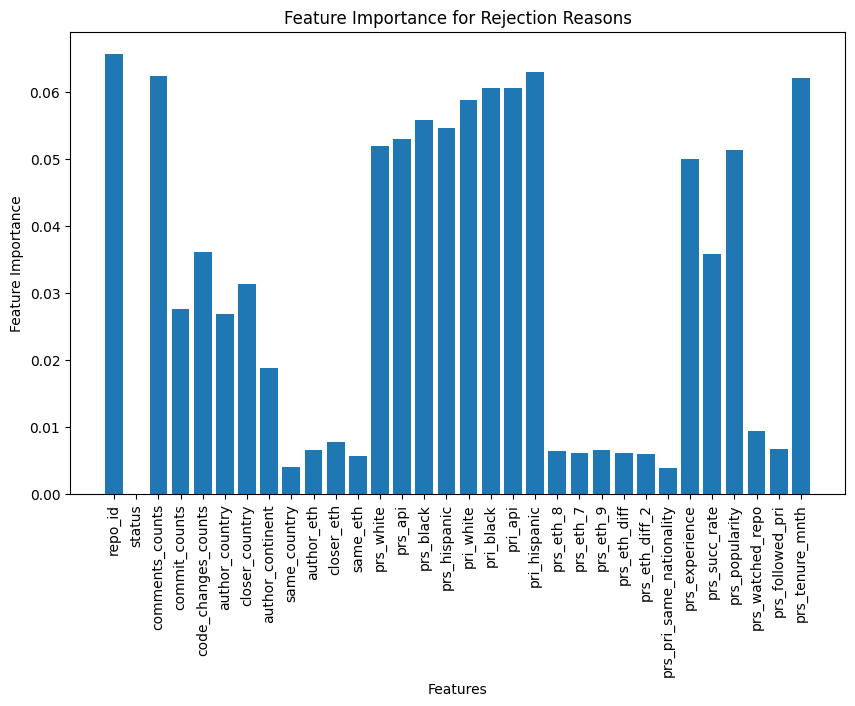

In [66]:
feature_importances = rf_classifier.feature_importances_
# plotting a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Rejection Reasons')
plt.xticks(rotation=90)
plt.show()

# Building a model against merged PRs

### Sampling the Data from merged prs based on nonmerged prs rejection reasons

In [237]:
#first we need to deal with the sampling of the merged data based on the categories
#categories: 'Quality' 'Successful', 'Unnecessary', 'No reason', 'Resolved', 'Replaced', 'Duplicate', 'Stale', 'Merge Conflict', 'Chaotic', 'Not PR'
sampled_data = pd.DataFrame()

category = 'Unnecessary'

# Calculate the desired number of samples for the specified category
number_of_samples = len(df_nonmerged[df_nonmerged['manual_analysis'] == category])

# Filter repo_id values associated with the specified category in rejected_data
repo_ids_for_category = df_nonmerged[df_nonmerged['manual_analysis'] == category]['repo_id'].unique()

# Filter 'df_merged' to keep only rows with 'repo_id' values in repo_ids_for_category
filtered_df_merged = df_merged[df_merged['repo_id'].isin(repo_ids_for_category)]


# Iterate through the repositories with rejected PRs in the specified category
for repo_id in repo_ids_for_category:
    # Filter rows from filtered_df_merged for the current repo_id
    repo_samples = filtered_df_merged[filtered_df_merged['repo_id'] == repo_id]
    
    # If there are multiple samples for the current repo, select one randomly
    if len(repo_samples) > 1:
        repo_samples = repo_samples.sample(n=1, random_state=42)
    
    # Append the selected sample to the sampled_data DataFrame
    sampled_data = pd.concat([sampled_data, repo_samples])

# Randomly select additional samples to reach the desired number
remaining_samples = number_of_samples - len(sampled_data)
additional_samples = filtered_df_merged.sample(n=remaining_samples, random_state=42)
sampled_data = pd.concat([sampled_data, additional_samples])


In [238]:
sampled_data.count()

repo_id                     1952
status                      1952
comments_counts             1952
commit_counts               1952
code_changes_counts         1952
checked                     1952
author_country              1952
closer_country              1952
author_continent            1952
same_country                1952
author_eth                  1952
closer_eth                  1952
same_eth                    1952
prs_white                   1897
prs_api                     1897
prs_black                   1897
prs_hispanic                1897
pri_white                   1912
pri_black                   1912
pri_api                     1912
pri_hispanic                1912
prs_eth_8                   1952
prs_eth_7                   1952
prs_eth_9                   1952
prs_eth_diff                1952
prs_eth_diff_2              1952
prs_pri_same_nationality    1952
prs_experience              1952
prs_succ_rate               1952
prs_popularity              1952
prs_watche

In [239]:
sampled_repo_ids = set(sampled_data['repo_id'])

# Check if all sampled 'repo_id' values are in 'repo_ids_for_category'
if all(repo_id in repo_ids_for_category for repo_id in sampled_repo_ids):
    print("All samples are from repositories with the specified rejected reason.")
else:
    print("Some samples are not from repositories with the specified rejected reason.")

All samples are from repositories with the specified rejected reason.


In [240]:
#now concat all the data from the said category and the sampled data and order them by repo_id
df_sample_reason = pd.concat([df_nonmerged[df_nonmerged['manual_analysis'] == category], sampled_data], axis=0)
df_sample_reason = df_sample_reason.sort_values(by=['repo_id'])
#drop two columns, 'checked' and 'manual_analysis'
df_sample_reason.drop(['checked', 'manual_analysis'], axis=1, inplace=True)

In [241]:
#show the count of datas with the value not_merged in status and if they are unique or not
df_sample_reason['status'].value_counts()

status
merged        1952
not-merged    1952
Name: count, dtype: int64

In [242]:
df_sample_reason.head(20)

,repo_id,status,comments_counts,commit_counts,code_changes_counts,author_country,closer_country,author_continent,same_country,author_eth,closer_eth,same_eth,prs_white,prs_api,prs_black,prs_hispanic,pri_white,pri_black,pri_api,pri_hispanic,prs_eth_8,prs_eth_7,prs_eth_9,prs_eth_diff,prs_eth_diff_2,prs_pri_same_nationality,prs_experience,prs_succ_rate,prs_popularity,prs_watched_repo,prs_followed_pri,prs_tenure_mnth
1062,6,merged,5.0,4.0,3.0,lovakia,china,Europe,0,White,Unknown,0,0.864294,0.012265,0.014323,0.107317,0.569895,0.032570,0.367695,0.028239,White,White,Unknown,White,White,0,3,67,21,1,0,11
5538,6,merged,1.0,1.0,1.0,\N,china,\N,0,API,Unknown,0,0.093853,0.894823,0.006393,0.004183,0.861588,0.040257,0.015183,0.082972,API,API,Unknown,API,API,0,188,20,3,0,0,27
115,6,merged,1.0,2.0,4.0,united states,china,North America,0,White,Unknown,0,0.991508,0.002199,0.000974,0.004593,0.569895,0.032570,0.367695,0.028239,White,White,White,White,White,0,9,56,33,1,1,2
4846,6,merged,0.0,1.0,3.0,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,0,1606,31,7,0,0,44
2829,6,not-merged,5.0,3.0,3.0,\N,china,\N,0,API,Unknown,0,0.105975,0.882329,0.004927,0.004077,0.569895,0.032570,0.367695,0.028239,API,API,Unknown,API,API,0,1,0,1,1,0,18
4923,6,merged,0.0,1.0,6.0,\N,\N,\N,\N,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.861588,0.040257,0.015183,0.082972,Unknown,White,Unknown,White,White,\N,1650,31,7,0,0,45
6675,6,merged,0.0,1.0,6.0,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.861588,0.040257,0.015183,0.082972,Unknown,White,Unknown,White,White,0,2089,34,8,0,1,62
7182,6,merged,0.0,1.0,1.0,\N,china,\N,0,Unknown,Unknown,0,0.889200,0.008001,0.088110,0.014689,0.569895,0.032570,0.367695,0.028239,Unknown,White,Unknown,White,White,0,2246,35,9,0,0,74
3593,6,merged,5.0,23.0,6.0,\N,china,\N,0,API,Unknown,0,0.093853,0.894823,0.006393,0.004183,0.569895,0.032570,0.367695,0.028239,API,API,Unknown,API,API,0,38,37,3,0,0,17
4889,6,merged,0.0,1.0,1.0,china,china,Asia,1,Unknown,Unknown,0,0.225369,0.107826,0.558558,0.108247,0.569895,0.032570,0.367695,0.028239,Unknown,Unknown,Unknown,Unknown,Unknown,1,232,50,35,1,0,22
